In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/wickedbear/Coding/Projects/Spread_Series/CSVs/daily_spread.csv')

In [3]:
df.head()

,Date,Spread
0,1996-12-31,0.66
1,1997-01-02,0.56
2,1997-01-03,0.57
3,1997-01-06,0.57
4,1997-01-07,0.56


In [4]:
df.isna().sum()

Date      0
Spread    0
dtype: int64

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

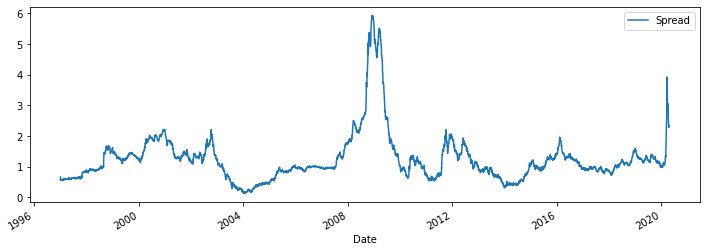

In [6]:
df.plot(figsize = (12, 4))

### Notes on Modeling

What you generally will try to do for any time series analysis is:

-Detrend your time series using differencing. ARMA models represent stationary processes, <br/>
_so we have to make sure there are no trends in our time series 
<br/>
-Look at ACF and PACF of the time series
<br/>
-Decide on the AR, MA, and order of these models
<br/>
-Fit the model to get the correct parameters and use for prediction

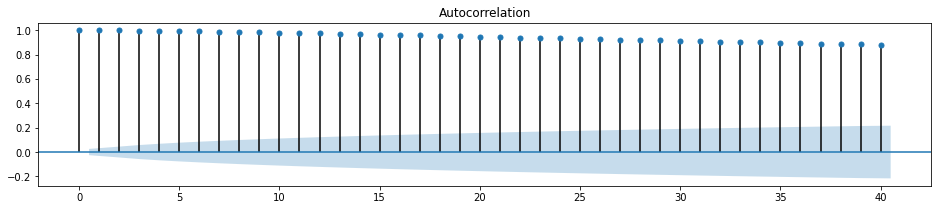

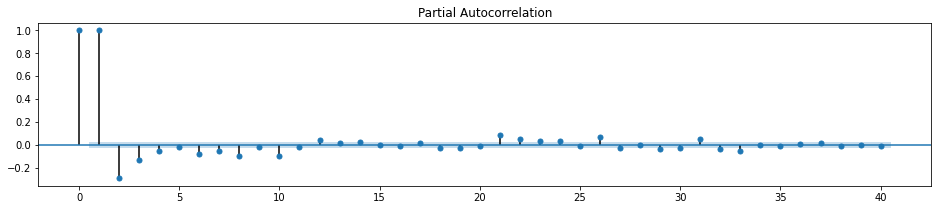

In [7]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(16,3))
plot_acf(df,ax=ax, lags=40);

fig, ax = plt.subplots(figsize=(16,3))
plot_pacf(df,ax=ax, lags=40);

In [8]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm

# Fit an AR(1) model
mod_arma = ARMA(df, order=(1,0))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

# Print out the estimate for the constant and for theta
print(res_arma.params)

                              ARMA Model Results                              
Dep. Variable:                 Spread   No. Observations:                 5821
Model:                     ARMA(1, 0)   Log Likelihood               11977.471
Method:                       css-mle   S.D. of innovations              0.031
Date:                Sun, 31 May 2020   AIC                         -23948.942
Time:                        07:07:18   BIC                         -23928.935
Sample:                             0   HQIC                        -23941.984
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.3195      0.477      2.764      0.006       0.384       2.255
ar.L1.Spread     0.9993      0.000   2264.283      0.000       0.998       1.000
                                    Roots   

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


### Need to Difference the Model

In [9]:
data_diff = df.diff().dropna()
data_diff

,Spread
Date,
1997-01-02,-0.10
1997-01-03,0.01
1997-01-06,0.00
1997-01-07,-0.01
1997-01-08,-0.01
...,...
2020-04-14,-0.10
2020-04-15,0.06
2020-04-16,-0.01


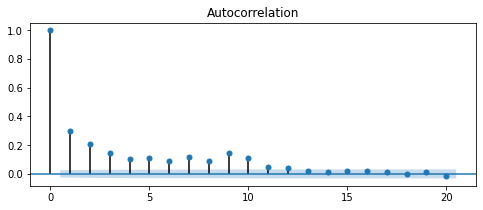

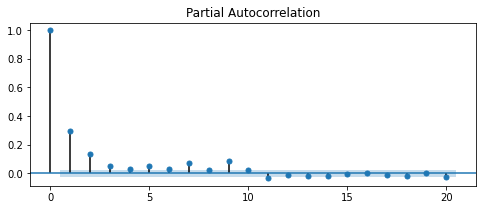

In [15]:
fig, ax = plt.subplots(figsize=(8,3))
plot_acf(data_diff,ax=ax, lags=20);

fig, ax = plt.subplots(figsize=(8,3))
plot_pacf(data_diff,ax=ax, lags=20);

In [16]:
data_diff_90 = df.diff(periods=90).dropna()
data_diff_90

,Spread
Date,
1997-05-12,-0.06
1997-05-13,0.04
1997-05-14,0.01
1997-05-15,0.02
1997-05-16,0.03
...,...
2020-04-14,1.13
2020-04-15,1.19
2020-04-16,1.21


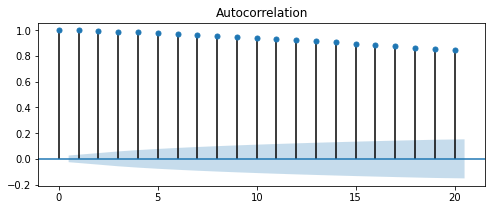

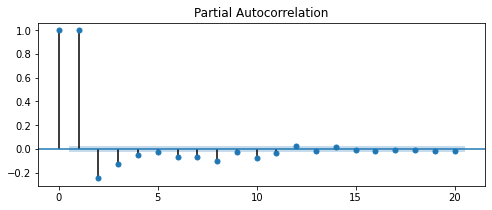

In [17]:
fig, ax = plt.subplots(figsize=(8,3))
plot_acf(data_diff_90,ax=ax, lags=20);

fig, ax = plt.subplots(figsize=(8,3))
plot_pacf(data_diff_90,ax=ax, lags=20);

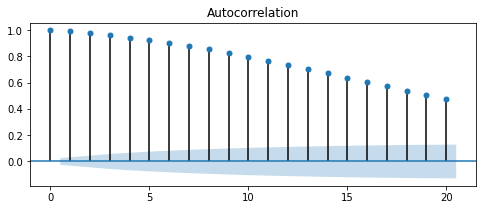

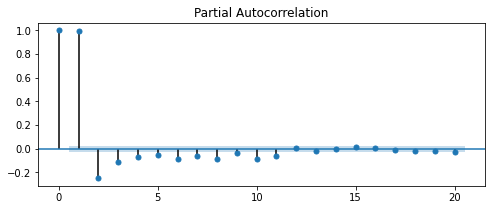

In [18]:
data_diff_30 = df.diff(periods=30).dropna()
data_diff_30

fig, ax = plt.subplots(figsize=(8,3))
plot_acf(data_diff_30,ax=ax, lags=20);

fig, ax = plt.subplots(figsize=(8,3))
plot_pacf(data_diff_30,ax=ax, lags=20);